In [20]:
#Importing required libraries:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
'''import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)'''

'import kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("uciml/autompg-dataset")\n\nprint("Path to dataset files:", path)'

In [22]:
#Loading the file data
df=pd.read_csv("auto-mpg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [24]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
#To show the no:of null values:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [27]:
#Deleting nan values (if any):
df=df.dropna() 

In [28]:
#To fill the unknown values in horsepwer attribute:
df.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
df['horsepower'] = df['horsepower'].astype(float)  # Convert to float if needed
df['horsepower'].fillna(df['horsepower'].mean())

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [29]:
#Display the statistical summary of data:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [30]:
#Dropping the car name column:
df.drop('car name', axis=1, inplace=True)
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


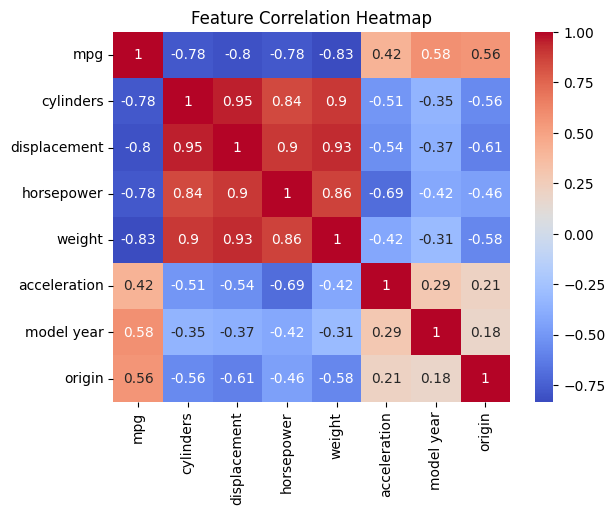

In [31]:
#correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

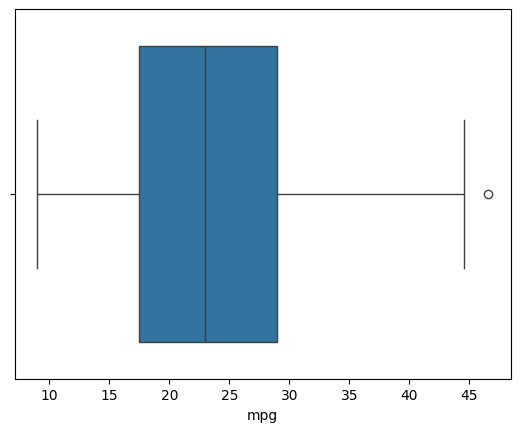

In [32]:
#Box plot:
sns.boxplot(x=df['mpg'])
plt.show()

In [33]:
#Standard Scaling:
columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
def standard_scalar():
    for col in columns:
        mean=df[col].mean()
        std=df[col].std()
        df[col]=(df[col]-mean)/std
    return df
df=standard_scalar()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.705551,1.496308,1.089233,0.663285,0.630077,-1.293870,-1.625381,-0.714246
1,-1.089379,1.496308,1.501624,1.572585,0.853259,-1.475181,-1.625381,-0.714246
2,-0.705551,1.496308,1.194728,1.182885,0.549778,-1.656492,-1.625381,-0.714246
3,-0.961437,1.496308,1.060461,1.182885,0.546236,-1.293870,-1.625381,-0.714246
4,-0.833494,1.496308,1.041280,0.923085,0.565130,-1.837804,-1.625381,-0.714246
...,...,...,...,...,...,...,...,...
393,0.445936,-0.855244,-0.512381,-0.479835,-0.213056,0.011571,1.619944,-0.714246
394,2.620966,-0.855244,-0.924773,-1.363154,-0.992422,3.275173,1.619944,0.532552
395,1.085650,-0.855244,-0.560333,-0.531795,-0.797581,-1.438919,1.619944,-0.714246
396,0.573879,-0.855244,-0.704191,-0.661694,-0.407897,1.099439,1.619944,-0.714246


In [34]:
# Create a new feature 'weight-to-horsepower' ratio:
df['weight-to-horsepower'] = df['weight']/df['horsepower']

In [49]:
df=df.dropna()#Dropping the nan values
x=df.drop(['mpg'], axis=1).values #as array
y=df['mpg'].values
df=df.dropna()
print(df.isnull().sum())

mpg                     0
cylinders               0
displacement            0
horsepower              0
weight                  0
acceleration            0
model year              0
origin                  0
weight-to-horsepower    0
dtype: int64


In [50]:
#Implementing train_test_split:
np.random.seed(42)
#train_test_split without scikit-learning:
indices = np.random.permutation(len(x))  #Shuffling data helps increase the accuracy

# Specify the split ratio (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(x) * split_ratio)

# Create train and test sets
train_indices = indices[:split_index]
test_indices = indices[split_index:]

x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]




In [51]:
#Training the linear regression model and predicting the outcome using scikit learning:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([-0.12359789, -0.79104901,  0.02817823,  0.62525823, -0.02492802,
        0.77503869,  0.56143942,  0.43337081,  0.32583028,  0.82897399,
       -0.7571721 , -2.19699167,  0.44767519, -0.40964319,  0.85899081,
       -0.18091325, -1.59143138,  0.77379877, -1.20859515,  0.15963294,
        0.32127789, -0.14450999, -0.77775164, -0.76873885, -1.43932905,
        0.66332302,  0.65907996,  0.37484207, -0.50172198,  0.98672791,
       -1.03726045, -0.06296957,  0.06917736,  1.27544648,  0.87350197,
       -1.24850005,  0.46584622,  1.35972957,  1.1325118 ,  0.91324215,
        0.4993173 ,  0.24707117, -0.29848229, -0.28191193,  0.90498288,
       -0.87996752,  0.28537879,  0.35086372, -0.09010379,  1.42081769,
        0.66604999,  0.09048491, -0.20929216,  0.34405782, -0.6553458 ,
        0.92394027, -0.09939365,  0.89749062,  1.5170172 ,  0.02250845,
        1.42844971,  0.52672128,  0.06222189, -0.58092136, -0.05453815,
       -0.29358125,  1.05922437, -1.24791733,  0.47459639,  1.07

In [52]:
#Evaluating the performance of the model(Metrics Squared Error):
def mean_squared_error(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)
mse=mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is:{mse}")

Mean Squared Error is:0.150104484827732


In [53]:
#Evaluvating the performance of the model(R-squared):
def r2_score(y_test, y_pred):
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_res = np.sum((y_test - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)
r2=r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8342076157792371


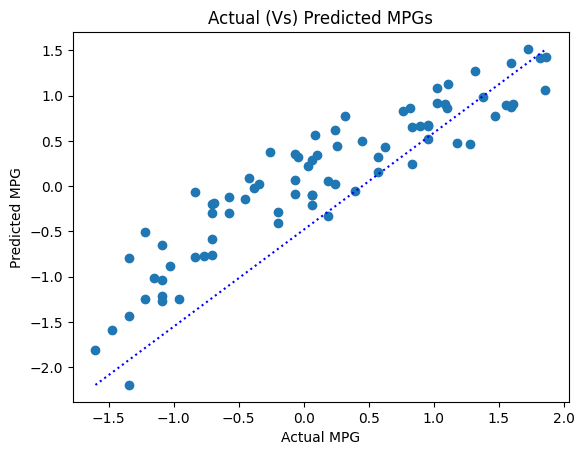

In [54]:
#Visualising the predictions (Vs) actual values(Scatter plot):
plt.scatter(y_test,y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual (Vs) Predicted MPGs")
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='blue',linestyle=':')
plt.show()

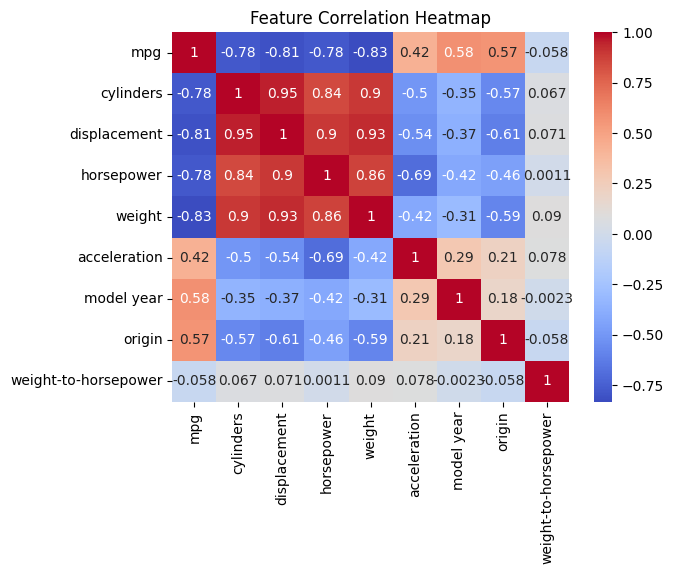

In [55]:
#Visualising the feature correlation heatmap:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()